<a href="https://colab.research.google.com/github/Haripriya9851/Yelp-Restaurants-Topic-Modelling---NLP/blob/main/Sentiment%20Analysis%20and%20Topic%20Modeling%20using%20NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis and Topic modeling for Yelp Reviews using NLP LDA and Gensim Algorithms
**Rationale** This dataset includes all TripAdvisor reviews written in 2015 (through part of 2016) for high review volume Vegas resorts and was collected as part of a large web crawl of over 50 Million online reviews at over 428k worldwide hotels. 

* [Dataset](https://drive.google.com/drive/folders/1nUIOHqvOoF5EkST8u_pMcL7gvKtCy0La?usp=sharing)
    * `vegas2015reviews.csv` contains the reviews 
    * `vegas_venue_info.csv` contains a list of venues in Vegas
    * Note that `gd` is the venue ID in both datasets


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Problem 1: Sentiment Analysis 

## First, let's get to know the dataset.

1. Read in the vegas reviews dataset (call this `df`)
1. Convert any columns that look like dates into Pandas datetime columns.
1. Read in the venue info dataset and merge it with the reviews dataset. (call the resulting dataframe `df`, i.e. write over the old `df`)

Answer the following for the resulting merged dataframe, `df`:
1. How many reviews are there?
1. How many unique hotels are there? Note `gd` is the ID variable for hotels on TripAdvisor.
1. What are the unique types of travel categories?
1. Plot a histogram of the review ratings. How would you describe the overall review ratings on TripAdvisor for Vegas resorts?

## Sentiment 

Use `TextBlob` library to compute the polarity and subjectivity of every review.

1. Compare the histogram of review polarity with review ratings. How are they different? What might you conclude based on this difference about how people rate and how people write?
1. To what degree are polarity and subjectivity correlated with ratings?
1. Use a groupby + corr() statement to calculate the correlation between review ratings and polarity by travel category. In which categories are review polarity most and least correlated with ratings? Any explanation for this relationship?

In [ ]:
#Read in the vegas reviews dataset (call this df)

import pandas as pd

review_url = 'https://drive.google.com/file/d/1AIn4VWk7UKHpw6oGgB3KGNVlOY1gsXMs/view?usp=sharing'
review_url='https://drive.google.com/uc?id=' + review_url.split('/')[-2]
df = pd.read_csv(review_url)
df.head()

,Unnamed: 0,gd,helpful_num,location,mgrRspnDummy,mgr_res_date,mrtext,ratingDate,review_id,reviewrating,reviewtext,reviewtitle,stay_month,stay_year,travel_category,username
0,15044,g45963-d1123368,NaN,"Walnut Creek, California",0,NaN,NaN,2015-07-01,284818340,5,An excellent property! The rooms are very nice...,“At the top of its game”,6.0,2015.0,business,cadby
1,15045,g45963-d1123368,NaN,"Maidstone, United Kingdom",0,NaN,NaN,2015-07-01,284776986,5,My first visit to Las Vegas and WOW!! Whilst a...,“ wow!! ”,9.0,2014.0,couple,Sonia H
2,15046,g45963-d1123368,NaN,Brussels,0,NaN,NaN,2015-06-30,284187374,5,Some of the most beautiful hotel rooms in the ...,“ Mass market but luxery hotel at north end of...,6.0,2015.0,couple,Globaliser
3,15047,g45963-d1123368,NaN,"Colchester, United Kingdom",0,NaN,NaN,2015-06-13,279887884,5,"This Hotel is exceptional, its beautifully set...",“ Highlight of Vegas ”,5.0,2015.0,couple,Sharcoates
4,15058,g45963-d1123368,NaN,"Denver, Colorado, United States",0,NaN,NaN,2015-06-13,279841140,5,"My husband and I stayed here during a trip,to ...","“ Beautiful hotel, great location ”",6.0,2015.0,couple,Kimberly A


In [ ]:
#Convert any columns that look like dates into Pandas datetime columns.

df['ratingDate'] = pd.to_datetime(df['ratingDate'])
df.head()

,Unnamed: 0,gd,helpful_num,location,mgrRspnDummy,mgr_res_date,mrtext,ratingDate,review_id,reviewrating,reviewtext,reviewtitle,stay_month,stay_year,travel_category,username
0,15044,g45963-d1123368,NaN,"Walnut Creek, California",0,NaN,NaN,2015-07-01,284818340,5,An excellent property! The rooms are very nice...,“At the top of its game”,6.0,2015.0,business,cadby
1,15045,g45963-d1123368,NaN,"Maidstone, United Kingdom",0,NaN,NaN,2015-07-01,284776986,5,My first visit to Las Vegas and WOW!! Whilst a...,“ wow!! ”,9.0,2014.0,couple,Sonia H
2,15046,g45963-d1123368,NaN,Brussels,0,NaN,NaN,2015-06-30,284187374,5,Some of the most beautiful hotel rooms in the ...,“ Mass market but luxery hotel at north end of...,6.0,2015.0,couple,Globaliser
3,15047,g45963-d1123368,NaN,"Colchester, United Kingdom",0,NaN,NaN,2015-06-13,279887884,5,"This Hotel is exceptional, its beautifully set...",“ Highlight of Vegas ”,5.0,2015.0,couple,Sharcoates
4,15058,g45963-d1123368,NaN,"Denver, Colorado, United States",0,NaN,NaN,2015-06-13,279841140,5,"My husband and I stayed here during a trip,to ...","“ Beautiful hotel, great location ”",6.0,2015.0,couple,Kimberly A


In [ ]:
df.shape[0]

46644

In [ ]:
#Read in the venue info dataset and merge it with the reviews dataset. (call the resulting dataframe df, i.e. write over the old df)

venue_url = 'https://drive.google.com/file/d/18gwz_VmCJpD2d48LoovGNwAY8T_-eTeP/view?usp=sharing'
venue_url = 'https://drive.google.com/uc?id=' + venue_url.split('/')[-2]
df1 = pd.read_csv(venue_url)
#df = pd.concat([df,df1], axis=1, join='inner')
df = df.merge(df1, how='inner', left_on='gd', right_on='gd')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,gd,helpful_num,location,mgrRspnDummy,mgr_res_date,mrtext,ratingDate,review_id,reviewrating,reviewtext,reviewtitle,stay_month,stay_year,travel_category,username,ranking,rating_vol,rdetails,lnglat,rsubrating,vtype,amenities,details,v_name,rating_cat
0,g45963-d1123368,NaN,"Walnut Creek, California",0,NaN,NaN,2015-07-01,284818340,5,An excellent property! The rooms are very nice...,“At the top of its game”,6.0,2015.0,business,cadby,"[4, 267]",9453.0,NaN,"[-115.164505, 36.12825]",{},Hotel_Review,"{'Room types': 'Suites Non-Smoking Rooms ', 'S...","{'Address:': '3121 Las Vegas Blvd. South, Las ...",Encore At Wynn Las Vegas,4.5
1,g45963-d1123368,NaN,"Maidstone, United Kingdom",0,NaN,NaN,2015-07-01,284776986,5,My first visit to Las Vegas and WOW!! Whilst a...,“ wow!! ”,9.0,2014.0,couple,Sonia H,"[4, 267]",9453.0,NaN,"[-115.164505, 36.12825]",{},Hotel_Review,"{'Room types': 'Suites Non-Smoking Rooms ', 'S...","{'Address:': '3121 Las Vegas Blvd. South, Las ...",Encore At Wynn Las Vegas,4.5
2,g45963-d1123368,NaN,Brussels,0,NaN,NaN,2015-06-30,284187374,5,Some of the most beautiful hotel rooms in the ...,“ Mass market but luxery hotel at north end of...,6.0,2015.0,couple,Globaliser,"[4, 267]",9453.0,NaN,"[-115.164505, 36.12825]",{},Hotel_Review,"{'Room types': 'Suites Non-Smoking Rooms ', 'S...","{'Address:': '3121 Las Vegas Blvd. South, Las ...",Encore At Wynn Las Vegas,4.5
3,g45963-d1123368,NaN,"Colchester, United Kingdom",0,NaN,NaN,2015-06-13,279887884,5,"This Hotel is exceptional, its beautifully set...",“ Highlight of Vegas ”,5.0,2015.0,couple,Sharcoates,"[4, 267]",9453.0,NaN,"[-115.164505, 36.12825]",{},Hotel_Review,"{'Room types': 'Suites Non-Smoking Rooms ', 'S...","{'Address:': '3121 Las Vegas Blvd. South, Las ...",Encore At Wynn Las Vegas,4.5
4,g45963-d1123368,NaN,"Denver, Colorado, United States",0,NaN,NaN,2015-06-13,279841140,5,"My husband and I stayed here during a trip,to ...","“ Beautiful hotel, great location ”",6.0,2015.0,couple,Kimberly A,"[4, 267]",9453.0,NaN,"[-115.164505, 36.12825]",{},Hotel_Review,"{'Room types': 'Suites Non-Smoking Rooms ', 'S...","{'Address:': '3121 Las Vegas Blvd. South, Las ...",Encore At Wynn Las Vegas,4.5


In [ ]:
# How many reviews are there

total_reviews = df.shape[0]
print("Total number of reviews:", total_reviews)

Total number of reviews: 46644


In [ ]:
# How many unique hotels are there? Note gd is the ID variable for hotels on TripAdvisor.

unique_hotels = df['gd'].unique()
print("Count of unique hotels:",len(unique_hotels))

Count of unique hotels: 34


In [ ]:
# What are the unique types of travel categories
import numpy as np

category = df['travel_category'].unique()
category = np.delete(category, 4)
print("Travel categories:", category)

Travel categories: ['business' 'couple' 'friends' 'family' 'solo']


Average review ratings on TripAdvisor for Vegas resorts: 4.04


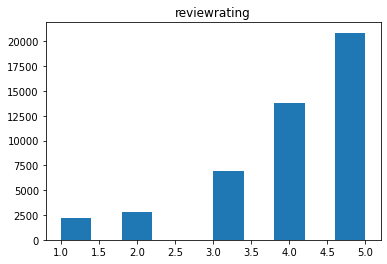

In [ ]:
# Plot a histogram of the review ratings. How would you describe the overall review ratings on TripAdvisor for Vegas resorts?

#overall_ratings=df.groupby('v_name', as_index=False)['reviewrating'].mean()
#vegas_resorts_list=(df.loc[df['v_name'] .str.contains('Vegas') ,'reviewrating']).mean()
overall_ratings = (df['reviewrating'].sum())/(df.shape[0])
#print("Overall review ratings on TripAdvisor for Vegas resorts:",round(vegas_resorts_list,2))
print("Average review ratings on TripAdvisor for Vegas resorts:",round(overall_ratings,2))

hist = df.hist(column='reviewrating', bins=10,grid=False)


Number of ratings are pretty high at 4 and 5. So, we can say most of the hotel ratings have attained postive rating.

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from textblob import TextBlob
df['polarity'] = df['reviewtext'].map(lambda text: TextBlob(text).sentiment.polarity)
df['subjectivity'] = df['reviewtext'].map(lambda text: TextBlob(text).sentiment.subjectivity)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87c4203dd0>]],
      dtype=object)

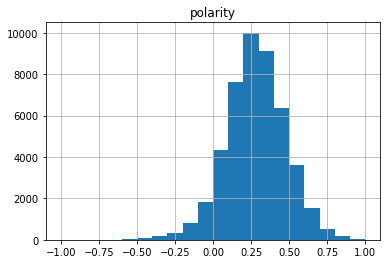

In [ ]:
from textblob import TextBlob

df['polarity'] = df['reviewtext'].map(lambda text: TextBlob(text).sentiment.polarity)
df['subjectivity'] = df['reviewtext'].map(lambda text: TextBlob(text).sentiment.subjectivity)

df.hist(column = 'polarity', bins = 20)
#df.hist(column = 'subjectivity', bins = 20)


We see that **polarity score for most of review texts lies in the rangeof [0,0.75]** which means **there are many positive statements.**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f67ba24cf50>,
      dtype=object)

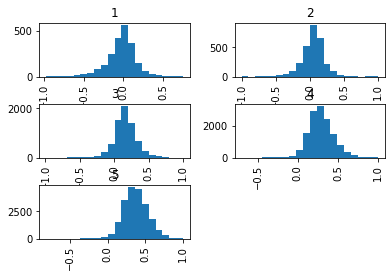

In [ ]:
# Compare the histogram of review polarity with review ratings. 
df.hist(column = 'polarity', by = 'reviewrating',bins=20)

From the graph we can see that, **review ratings are mostly aligned with the polarity score for least ratings**. Hotels with review rating 1,2 has polarity in the range [-0.5,0.5] while polarity scores for hotels with review rating 4,5 even has negative/neutral polarity.

We can **infer that people usually feel a need for writting when they are upset** or angry with the service/experience. They feel complaining may give a chance to fix issue. That's why **alignment between least review ratings and polarity is higher.**

On the other hand, **For higher ratings, people don't have a need to write a long intense review that captures the mood of the writer**. They make neutral review about the experience even when they rate the resorts as 4 or 5. That's why **alignment between high review ratings and polarity is neutral in the range of [0,0.7]**

In [ ]:
# To what degree are polarity and subjectivity correlated with ratings?
#df.hist(column = 'subjectivity', bins = 20)
review_polarity_corr = df['polarity']. corr(df['reviewrating'])
review_subjectivity_corr = df['subjectivity']. corr(df['reviewrating'])
print("Correlation of Review rating and Polarity:",review_polarity_corr)
print("Correlation of Review rating and subjectivity:",review_subjectivity_corr)

Correlation of Review rating and Polarity: 0.591409339170734
Correlation of Review rating and subjectivity: 0.23755542052022235


In [ ]:
# Use a groupby + corr() statement to calculate the correlation between review ratings and polarity by travel category. 
# In which categories are review polarity most and least correlated with ratings? Any explanation for this relationship?

df.groupby('travel_category')[['reviewrating', 'polarity']].corr()



reviewrating  polarity
travel_category                                     
business        reviewrating      1.000000  0.623229
                polarity          0.623229  1.000000
couple          reviewrating      1.000000  0.568238
                polarity          0.568238  1.000000
family          reviewrating      1.000000  0.599097
                polarity          0.599097  1.000000
friends         reviewrating      1.000000  0.595152
                polarity          0.595152  1.000000
solo            reviewrating      1.000000  0.536387
                polarity          0.536387  1.000000

Above result shows that 






**Business and Family category**'s reviews are **highly correlated** 

While **solo and couple category**'s reviews are **less correlated** with polarity and rating.

# Helper Functions

In [ ]:
import spacy, time
from gensim.models.ldamulticore import LdaMulticore # this is the multi-core version
from gensim import corpora # import the corpora module
from gensim.models import Phrases
from gensim.models.word2vec import LineSentence
from sklearn.model_selection import train_test_split


def line_doc(filename, encode = 'utf-8'):
    """
    generator function to read in reviews from the file
    and un-escape the original line breaks in the text
    """
    with open(filename, 'r', encoding = encode) as f:
        for txt in f:
            # yield returns next line
            yield txt.replace('\\n', '\n')
            # and get rid of any line breaks

# parsing to be done per sentence
def lemmatize(s, exclude):
    return [w.lemma_.lower() for w in s if (w.lemma_ not in exclude)&(~w.is_punct)]
# next will be a function that will pass a filename to the line_doc function
# and generate the parsed versions of ***EVERY SENTENCE***
# this function streams a file at filename and yields one parsed sentence at a time


def lemmatize_sentence_corpus(filename,nlp, batch_size, n_threads, sw=[], exclusions=[], encode = 'utf-8'):
    nlp.disable_pipes(["ner"]) # disable ner and tagger makes it a little faster
    # batch_size is the number of documents to parse in memory at a time
    # n_threads it the number of parallel (simultaneous processes to run)
    # n_threads is limited by the number of virtual cpu's on the system
    # the default free Colab system has only 2 virtual cores
    # most modern computers have at least 4
    exclude = set(sw + exclusions)
    for parsed_txt in nlp.pipe(line_doc(filename, encode = encode),batch_size=batch_size, n_threads=n_threads):
            for sent in parsed_txt.sents:
                yield ' '.join(lemmatize(sent, exclude))


def write_parsed_sentence_corpus(readfile, writefile, nlp, batch_size, n_threads, sw=[], exclusions =[], encode = 'utf-8'):
    streamingfile = lemmatize_sentence_corpus(readfile,nlp, batch_size, n_threads, sw=sw, exclusions=exclusions, encode = encode)
    with open(writefile, 'w', encoding = encode) as f:
        for sentence in streamingfile:
            if len(sentence)>0: # write sentence if includes non stopwords
                f.write(sentence+'\n')
    print('Success')


def phrase_detection(parsedfile, folderpath, passes = 2, returnmodels = True,threshold=10., encode = 'utf-8'):
    """
    parsedfile is the file location and name of the parsed sentence file
    folderpath is where the models and phrase detected texts need to be stored

    This function does phrase modeling. User specifies the number of passes.
    Each additional pass detects longer phrases. The maximum detectable phrase length for
    each pass, n, is 2^n.
    Returns the list of models by default. Also saves models and intermediary
    phrased sentences for each pass.
    """
    ngram = list()
    for it in range(passes):
        gen = LineSentence(parsedfile)
        gram=Phrases(gen, threshold = threshold)
        ngram.append(gram)
        modelpath = folderpath+'phrase_model_{}.phrasemodel'.format(it+1)
        textpath = folderpath+'sent_gram_{}.txt'.format(it+1)
        gram.save(modelpath)
        # Write sentence n-gram
        with open(textpath, 'w', encoding=encode) as f:
            for sent in gen:
                new_sent = ' '.join(gram[sent])
                f.write(new_sent + '\n')

    if returnmodels == True:
        return ngram


def phrase_prediction(rawfilepath, outpath,nlp, grams, sw =[], exclusions = [], batch_size = 500, n_threads = 2, encode = 'utf-8'):
    """
    rawfilepath is where the raw reviews (where 1 line = 1 review) are saved 
    outpath is where to save the resulting parsed and phrase modeled reviews
    nlp is the spacy parser object
    grams is a list of phrasemodels
    sw is a list of stopwords
    exclusions are additional words to exclude

    """
    with open(outpath, 'w', encoding = encode) as f:
        
        nlp.disable_pipes(["ner"]) # disable ner and tagger makes it a little faster
        exclude = set(sw + exclusions)
        
        for parsed_txt in nlp.pipe(line_doc(rawfilepath, encode = encode),batch_size=batch_size, n_threads=n_threads):
            doc = list()
            for sent in parsed_txt.sents:
                parsed = lemmatize(sent, exclude)
                for gram in grams: # loop through phrase models
                    parsed = gram[parsed] # apply phrase model transformation to sentence
                doc.append(' '.join(parsed).strip()) # append resulting phrase modeled sentence to list "doc"
            # write the transformed review as a single line in the new file
            txt_gram = ' '.join(doc).strip() # join all sentences in doc together as txt_gram
            f.write(txt_gram + '\n') # write the entire phrase modeled and parsed doc as one line in file
            

# 2. Topics in hotel reviews 

## Preprocessing the texts (3)

In this part, you will need to borrow the functions (attached):
1. Create a folder on your google drive to save your NLP files
1. Write a file containing raw reviews.
1. Lemmatize this file into a new file of sentences.
    1. remove stopwords
    1. remove punctuation
    1. Go grab a coffee while this runs. (takes ~10 mins)
1. Apply phrase model twice to identify phrases of up to 4 words in length.
1. Go back to the raw reviews and lemmatize + apply the phrase models at the review level, write the resulting review-level (1 line = 1 review) file to your NLP folder.
    1. Go grab a coffee while this runs. (takes ~10 mins)
1. Create a column in your dataframe called "parsed" that contains the resulting parsed versions of each reviews.
    1. Be sure to save this dataframe so you don't have to start from scratch (can read it in if you come back to the assignment). 
    1. If you come back to this part, make sure that you that you don't delete the outputs from previous session.
1. List the directory of your NLP folder to show that your intermediate steps have been saved.

## LDA model (3)

Apply the LDA model to the parsed reviews 

1. Create a dictionary
1. Filter extreme words in the dictionary
1. Create a corpus of reviews where 1 document = 1 review.
1. Run the LDA for 10-70 topics (inclusive of 70), skipping 10 at a time. (go grab a coffee, this takes ~ 15 minutes)

**How many topics is best in terms of perplexity?**

### Visualize the topics. 

1. Load the best model.
1. Create an LDAVis. (remember you have to `! pip install pyldavis` first)
1. **Pick 3 topics that kind of make sense and describe what they represent.**

### Use LDA to compare pos vs neg reviewers
Imagine you are the marketing director for one of these hotels (pick one of the resorts), **what are the differences in topics mentioned by satisfied and dissatisfied customers?** 

In [ ]:
# Create a folder on your google drive to save your NLP files
# Write a file containing raw reviews.
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

import os
os.mkdir("/content/drive/MyDrive/Hotel Reviews NLP1")



Mounted at /content/drive


In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once in a notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#Create a Raw reviews file to store a text file.
uploaded = drive.CreateFile({'title': 'Raw_Hotel_Reviews.txt'})
uploaded.SetContentString('')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

# Create Lemmatised reviews file to store a text file a text file.
uploaded = drive.CreateFile({'title': 'lemmatised_parsed_reviews.txt'})
uploaded.SetContentString('')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

# Create reviews phrase detection file to store a text file.
uploaded = drive.CreateFile({'title': 'reviews_with_phrase_detection.txt'})
uploaded.SetContentString('')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

# Create reviews phrase detection file to store a text file.
uploaded = drive.CreateFile({'title': 'phrase_modeled_reviews.txt'})
uploaded.SetContentString('')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

In [ ]:
import numpy as np

lemm_file_path='/content/drive/MyDrive/lemmatised_parsed_reviews.txt'
raw_file_path="/content/drive/MyDrive/Raw_Hotel_Reviews.txt" #raw file path
phrase_detected_file_path='/content/drive/MyDrive/reviews_with_phrase_detection (1).txt'
outpath='/content/drive/MyDrive/phrase_modeled_reviews.txt'
to_write_txt=df['reviewtext']
np.savetxt(raw_file_path, to_write_txt, fmt='%s')

In [ ]:
#Lemmatize this file into a new file of sentences.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
nlp=spacy.load('en_core_web_sm')
write_parsed_sentence_corpus(raw_file_path,lemm_file_path,nlp=nlp,batch_size=1,n_threads=2,sw=stop_words)


Success


In [ ]:
#Apply phrase model twice to identify phrases of up to 4 words in length.
phrase_detection(lemm_file_path, phrase_detected_file_path)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
#Go back to the raw reviews and lemmatize + apply the phrase models at the review level, write the resulting review-level (1 line = 1 review) file to your NLP folder.
nlp=spacy.load('en_core_web_sm')
reloaded_model1=Phrases.load("/content/drive/MyDrive/reviews_with_phrase_detection.txtphrase_model_1.phrasemodel")
reloaded_model2=Phrases.load("/content/drive/MyDrive/reviews_with_phrase_detection.txtphrase_model_2.phrasemodel")
grams=[reloaded_model1,reloaded_model2]

phrase_prediction(raw_file_path, outpath,nlp, grams=grams,sw =stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
#Create a column in your dataframe called "parsed" that contains the resulting parsed versions of each reviews.
parsed_review=[]
with open(outpath, 'r') as f:
        for sentence in f:
          parsed_review.append(sentence.strip())

df['Parsed']=pd.DataFrame(parsed_review)

In [ ]:
df.head(5)

,gd,helpful_num,location,mgrRspnDummy,mgr_res_date,mrtext,ratingDate,review_id,reviewrating,reviewtext,reviewtitle,stay_month,stay_year,travel_category,username,ranking,rating_vol,rdetails,lnglat,rsubrating,vtype,amenities,details,v_name,rating_cat,polarity,subjectivity,Parsed
0,g45963-d1123368,NaN,"Walnut Creek, California",0,NaN,NaN,2015-07-01,284818340,5,An excellent property! The rooms are very nice...,“At the top of its game”,6.0,2015.0,business,cadby,"[4, 267]",9453.0,NaN,"[-115.164505, 36.12825]",{},Hotel_Review,"{'Room types': 'Suites Non-Smoking Rooms ', 'S...","{'Address:': '3121 Las Vegas Blvd. South, Las ...",Encore At Wynn Las Vegas,4.5,0.515000,0.712727,excellent property room nicely generous size s...
1,g45963-d1123368,NaN,"Maidstone, United Kingdom",0,NaN,NaN,2015-07-01,284776986,5,My first visit to Las Vegas and WOW!! Whilst a...,“ wow!! ”,9.0,2014.0,couple,Sonia H,"[4, 267]",9453.0,NaN,"[-115.164505, 36.12825]",{},Hotel_Review,"{'Room types': 'Suites Non-Smoking Rooms ', 'S...","{'Address:': '3121 Las Vegas Blvd. South, Las ...",Encore At Wynn Las Vegas,4.5,0.171307,0.657576,-pron- first visit las_vegas wow whilst hotel ...
2,g45963-d1123368,NaN,Brussels,0,NaN,NaN,2015-06-30,284187374,5,Some of the most beautiful hotel rooms in the ...,“ Mass market but luxery hotel at north end of...,6.0,2015.0,couple,Globaliser,"[4, 267]",9453.0,NaN,"[-115.164505, 36.12825]",{},Hotel_Review,"{'Room types': 'Suites Non-Smoking Rooms ', 'S...","{'Address:': '3121 Las Vegas Blvd. South, Las ...",Encore At Wynn Las Vegas,4.5,0.253931,0.515590,beautiful hotel room world reserve wynn websit...
3,g45963-d1123368,NaN,"Colchester, United Kingdom",0,NaN,NaN,2015-06-13,279887884,5,"This Hotel is exceptional, its beautifully set...",“ Highlight of Vegas ”,5.0,2015.0,couple,Sharcoates,"[4, 267]",9453.0,NaN,"[-115.164505, 36.12825]",{},Hotel_Review,"{'Room types': 'Suites Non-Smoking Rooms ', 'S...","{'Address:': '3121 Las Vegas Blvd. South, Las ...",Encore At Wynn Las Vegas,4.5,0.334430,0.607018,hotel exceptional -pron- beautifully set every...
4,g45963-d1123368,NaN,"Denver, Colorado, United States",0,NaN,NaN,2015-06-13,279841140,5,"My husband and I stayed here during a trip,to ...","“ Beautiful hotel, great location ”",6.0,2015.0,couple,Kimberly A,"[4, 267]",9453.0,NaN,"[-115.164505, 36.12825]",{},Hotel_Review,"{'Room types': 'Suites Non-Smoking Rooms ', 'S...","{'Address:': '3121 Las Vegas Blvd. South, Las ...",Encore At Wynn Las Vegas,4.5,0.316111,0.734931,-pron- husband -pron- stay trip vegas friend -...


In [ ]:
#List file in Hotel Reviews Directory
import os
os.chdir("/content/drive/MyDrive/Hotel Reviews NLP1")
!ls

### LDA Model



In [ ]:
# Create Dictionary of parsed words
#Filter extreme words in the dictionary

parsed_data=df['Parsed'].tolist()
dict_of_words= corpora.Dictionary(d.split() for d in parsed_data)
print(len(dict_of_words))
dict_of_words.filter_extremes(keep_n=None)
print(len(dict_of_words))

#Create a corpus of reviews where 1 document = 1 review.
split_parsed_review=[d.split() for d in parsed_data]
doc_review_corpus = [dict_of_words.doc2bow(d) for d in split_parsed_review]

#Run the LDA for 10-70 topics (inclusive of 70) skipping 10 at a time
#How many topics is best in terms of perplexity?
perplexity_arr=[]
for k in range(10,71,10):
  LDA_Model= LdaMulticore(doc_review_corpus, id2word=dict_of_words, num_topics=k, per_word_topics=True, chunksize=100, passes=1)
  perplexity_val=LDA_Model.log_perplexity(doc_review_corpus)
  print('\nPerplexity of LDA with ',k, " topics:",perplexity_val) 
  perplexity_arr.append(perplexity_val)

40923
12818


Based on running LDA for 10-70 topics with step size of 10, we see that **Perplexity score for 70 topics is the lowest with "-8.254". So, 70 topics can be chosen for building the Best LDA model**

In [ ]:
#load the best model
Best_lda_model = LdaMulticore(doc_review_corpus, id2word=dict_of_words, num_topics=70, per_word_topics=True, chunksize=100, passes=1)

In [ ]:
!pip install pyLDAvis==3.3.0

In [ ]:
# Visualize the topics
import pyLDAvis
import pyLDAvis.gensim_models


pyLDAvis.enable_notebook()
LDA_Visualization= pyLDAvis.gensim_models.prepare(Best_lda_model, doc_review_corpus,dict_of_words)
LDA_Visualization
pyLDAvis.save_html(LDA_Visualization, 'LDA_Visualization.html')

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
57     0.260071  0.249274       1        1  13.034165
24     0.352386  0.007784       2        1   7.370728
63     0.322916 -0.116987       3        1   4.804478
19     0.185459  0.109728       4        1   3.514246
59     0.250479  0.048007       5        1   3.374097
...         ...       ...     ...      ...        ...
58    -0.110506 -0.012419      66        1   0.521398
0     -0.110049 -0.018237      67        1   0.521024
48    -0.107932 -0.016444      68        1   0.466608
65    -0.110987 -0.024494      69        1   0.419835
49    -0.096449 -0.013079      70        1   0.415777

[70 rows x 5 columns], topic_info=              Term          Freq         Total Category  logprob  loglift
56           staff  17723.000000  17723.000000  Default  30.0000  30.0000
42            good  27487.000000  27487.000000  Default  29.0000  29.0000
158          great  31558.000000  31558.000000  Default  28.0000  28.0000
905           aria  13061.000000  13061.000000  Default  27.0000  27.0000
82           check  20096.000000  20096.000000  Default  26.0000  26.0000
...            ...           ...           ...      ...      ...      ...
735         corner    246.667141    591.861637  Topic70  -3.6870   4.6075
1418         wrong    327.323432    955.695796  Topic70  -3.4041   4.4113
12787  lemon_grass     76.850268    108.170627  Topic70  -4.8532   5.1409
154      expensive    598.171812   2822.811562  Topic70  -2.8012   3.9312
153     everything     60.199331   7526.961614  Topic70  -5.0974   0.6542

[3012 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
320       5  0.034888        $
320       7  0.002532        $
320       8  0.696924        $
320      24  0.265321        $
1610     42  0.998511    $_100
...     ...       ...      ...
9365     66  0.998383  zarkana
2467     18  0.996270     zero
2073     22  0.988272        £
715      34  0.998300        ’
716      34  0.997185       ’s

[5124 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[58, 25, 64, 20, 60, 38, 18, 70, 39, 67, 53, 22, 4, 56, 19, 37, 47, 55, 17, 31, 26, 33, 6, 10, 36, 44, 54, 2, 16, 24, 51, 21, 69, 7, 3, 9, 27, 52, 46, 29, 15, 23, 42, 30, 57, 61, 5, 43, 45, 41, 32, 48, 34, 63, 28, 11, 68, 62, 14, 8, 13, 65, 12, 35, 40, 59, 1, 49, 66, 50])

### **3 Topics from Hotel Reviews Dataset**

Topic 8:

topic 8's some of the frequent terms includes check, charge, pay, bill, extra, fee, wait, long queue, per_night, price, service, internet, $. From this we can infer that **topic 8 is about billing/check-out experience of the users**.

Topic 49:

Some of the frequent terms of topic 49 are mall,taxi, cafe, cabanas, center, south, reasonable_price,position, Pool, cabanas, loungues, cozy,airy. We can understand that **topic 49 is about easily accessible fun and roaming places near hotel.**

Topic 4:

Frequent terms of topic 4 are bathroom, tv, small, lighting, window, open, size, big, spacious, desk, chair. It's explainable that **topic 4 is all about the room and components of room.**

some other topics:
1.   Topic 22 is related to Music and clubbing
2.   Topic 14 is related to hotel location and hospitality

# **Finding Positive and Negative Topics using LDA for Planet Hollywood Resort & Casino**

Considering myself as the Marketing director of 'Planet Hollywood Resort & Casino', I would like to know the positive and negative topics based on reviews of the customer to take appropriate actions in order to improve service and amenities of the resort.

**Initial Try:**

Tried to find positive and negative topics based on all(pos+neg) reviews. Topics generated were more generic. Unable to identify topic that is about root cause of dissatisfaction. So, followed below procedure.

#### **Procedure followed to find topics:**


1.  store resort's reviews as negative and positive based on polarity score in separate dataframes 

2.  Build LDA Model based on categorised dataframes to find 5 main topics from each

3.  Analyse for root cause for satisfaction and dissatisfaction of customers  from topics

4. As the Managing Director, plan on next steps

In [ ]:
holly_resort_details=df.loc[df['v_name'] == "Planet Hollywood Resort & Casino"]
holly_resort_details=holly_resort_details[["gd","v_name","ratingDate","reviewrating","reviewtext","Parsed","polarity","subjectivity"]]
holly_resort_details

,gd,v_name,ratingDate,reviewrating,reviewtext,Parsed,polarity,subjectivity
27826,g45963-d91687,Planet Hollywood Resort & Casino,2015-06-23,3,I came to Vegas for my 25th Birthday. Because ...,-pron- come vegas -pron- 25th birthday -pron- ...,0.035976,0.626429
27827,g45963-d91687,Planet Hollywood Resort & Casino,2015-06-23,2,A very rude staff member told me off when I in...,rude staff member tell -pron- -pron- interrupt...,-0.092778,0.752222
27828,g45963-d91687,Planet Hollywood Resort & Casino,2015-06-23,5,This was our first time there. The whole exper...,-pron- first time whole experience begin end e...,0.400000,0.551481
27829,g45963-d91687,Planet Hollywood Resort & Casino,2015-06-12,5,My best friend invited me to a 36-hour Vegas t...,-pron- good friend invite -pron- 36-hour vegas...,0.222396,0.529861
27830,g45963-d91687,Planet Hollywood Resort & Casino,2015-03-16,5,Stayed here for 7 nights. We were located on t...,stay 7 night -pron- locate 50th_floor look bac...,0.171580,0.415974
...,...,...,...,...,...,...,...,...
29615,g45963-d91687,Planet Hollywood Resort & Casino,2015-03-16,5,"Favorite casino, Earl sandwich shop in casino ...",favorite casino earl sandwich shop casino good...,0.487708,0.630000
29616,g45963-d91687,Planet Hollywood Resort & Casino,2015-03-16,4,This rooms are good and the staff were very pr...,room good staff professional atmosphere cater ...,0.339091,0.493636
29617,g45963-d91687,Planet Hollywood Resort & Casino,2015-03-16,2,I will start with the good- the room was huge....,-pron- start good- room huge good end -pron- f...,0.170000,0.645000
29618,g45963-d91687,Planet Hollywood Resort & Casino,2015-03-16,4,guys trip out to vegas to watch some college h...,guy trip vegas watch college hoop conf tourney...,0.155556,0.348611


In [ ]:
#Building LDA model 
holly_parsed_data=holly_resort_details['Parsed'].tolist()
holly_dict_of_words= corpora.Dictionary(d.split() for d in holly_parsed_data)
print(len(holly_dict_of_words))
holly_dict_of_words.filter_extremes(keep_n=None)
print(len(holly_dict_of_words))

#Doc2bow--> Convert document (a list of words) into the bag-of-words 
#format = list of (token_id, token_count) 2-tuples. 
#Each word is assumed to be a tokenized and normalized string.

holly_split_parsed_review=[d.split() for d in holly_parsed_data]
holly_doc_review_corpus = [holly_dict_of_words.doc2bow(d) for d in holly_split_parsed_review]

holly_LDA_Model= LdaMulticore(holly_doc_review_corpus, id2word=holly_dict_of_words, num_topics=40, per_word_topics=True, chunksize=100, passes=1)

In [ ]:
!pip install pyLDAvis==3.3.0

In [ ]:


import pyLDAvis
import pyLDAvis.gensim_models
# Visualize the Negative topics

pyLDAvis.enable_notebook()
holly_LDA_Visualization= pyLDAvis.gensim_models.prepare(holly_LDA_Model, holly_doc_review_corpus,holly_dict_of_words)
holly_LDA_Visualization
pyLDAvis.save_html(holly_LDA_Visualization, 'holly_LDA_Visualization.html')

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
34    -0.201691  0.047393       1        1  11.227315
10    -0.060267 -0.023254       2        1   5.555040
20     0.081362 -0.037335       3        1   5.156837
16    -0.090585 -0.036474       4        1   4.727688
8      0.010153 -0.150422       5        1   4.268064
33    -0.039720 -0.090187       6        1   3.841147
2     -0.016723  0.015001       7        1   3.557009
9      0.034716  0.014570       8        1   3.234594
19    -0.005403 -0.058745       9        1   3.232830
18    -0.082300 -0.010489      10        1   3.067716
11    -0.050706  0.012220      11        1   2.930777
35    -0.120367  0.129895      12        1   2.767871
3     -0.098313  0.000104      13        1   2.765045
15    -0.133423  0.002528      14        1   2.601585
28     0.012345  0.002391      15        1   2.486092
13    -0.018762 -0.067975      16        1   2.454420
23     0.095070  0.027959      17        1   2.453089
5      0.052402  0.074949      18        1   2.172710
36    -0.098445 -0.044099      19        1   2.095614
32    -0.055032  0.169046      20        1   1.860649
39     0.019905  0.059067      21        1   1.858137
7      0.063866 -0.078330      22        1   1.857154
38     0.020325  0.032426      23        1   1.734581
12     0.100531 -0.006206      24        1   1.694151
37     0.089826  0.019431      25        1   1.678737
31     0.014967 -0.288185      26        1   1.669766
30    -0.139004  0.113646      27        1   1.579444
26     0.203819  0.098546      28        1   1.577969
29     0.089852 -0.002981      29        1   1.532523
21    -0.078064  0.070056      30        1   1.517180
0      0.214394  0.054315      31        1   1.484320
24     0.001699  0.056197      32        1   1.461435
6      0.007465 -0.077419      33        1   1.446356
27    -0.027934 -0.027455      34        1   1.264908
22     0.047179  0.056604      35        1   0.967985
1      0.088845 -0.010091      36        1   0.956889
14     0.113570  0.114982      37        1   0.912236
4      0.133283 -0.070051      38        1   0.888720
17    -0.132774 -0.048850      39        1   0.819377
25    -0.046062 -0.042777      40        1   0.642041, topic_info=           Term         Freq        Total Category  logprob  loglift
175        pool   535.000000   535.000000  Default  30.0000  30.0000
226          ph   360.000000   360.000000  Default  29.0000  29.0000
37        great  1202.000000  1202.000000  Default  28.0000  28.0000
328  resort_fee   196.000000   196.000000  Default  27.0000  27.0000
297        food   345.000000   345.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
454       think     6.485540   184.757709  Topic40  -4.3081   1.6988
43        hotel     9.223227  1688.454742  Topic40  -3.9560  -0.1616
76        still     5.856011   163.844978  Topic40  -4.4102   1.7168
166       night     5.816229   474.274215  Topic40  -4.4170   0.6471
133        time     4.975784   772.484506  Topic40  -4.5731   0.0032

[2206 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
282       1  0.418679            $
282       2  0.086394            $
282       4  0.039874            $
282       7  0.033228            $
282      10  0.019937            $
...     ...       ...          ...
1009     38  0.158384  young_crowd
1000     30  0.564112    young_hip
1567     26  0.894775        yummy
679       1  0.953988            ’
916      14  0.879152           ’s

[7120 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[35, 11, 21, 17, 9, 34, 3, 10, 20, 19, 12, 36, 4, 16, 29, 14, 24, 6, 37, 33, 40, 8, 39, 13, 38, 32, 31, 27, 30, 22, 1, 25, 7, 28, 23, 2, 15, 5, 18, 26])

Here are some meaningful topics and the related words from the lot:

**Topic 36: casino**

>frequent words:cool,classy, high-end, ambience

**topic 15:(lamba=0.5) bad reviews about building/maintenance**

>frequent words:dust,rock,understaffed,terrific,carpet,shower-head,loud

**topic 1: Front desk assistance and room service**

> frequent words: front-desk,wait,credit card, hour, house keeping, experiences

**topic 5: amenities of resort and accessible places around resort**
>hotel, music, shopping, lobby, valet-parking

**topic 28: Restaurant service**
> frequent words: food,excellent, buffet, pizza, cashier, drink, bar


### Insights Derived from LDA Model built on Pos+Neg Topics:

Based on some of the topics listed we can say that customers are satisfied with location, quality service of restaurants, casino, spa of the resorts. 

Dissatisfied customers wants to improve room service response time. Other thing they expect/ask is more cleaner rooms and environment.


Topics built by LDA model above didn't capture the main issue that dissatisfied customers had faced. So, digging deeper on next section :)

### Deeper into  Negative and Positive review of Planet HollyWood Resort
So, to dive deeper in the negative and positive topics i am building LDA based on neg and pos reviews alone by separating them based on polarity scores.

In [ ]:
#separting negative and pos reviews based on polarity

resort_negative_rev= holly_resort_details[holly_resort_details['polarity'] <= 0.3]
resort_positive_rev = holly_resort_details[holly_resort_details['polarity'] > 0.3 ] 

In [ ]:
# LDA model to derive 5 topics from Negative reviews
# Reason for choosing num of topics as 5 for LDA modelling: 
# Due to less words in dictionary, extracting 5 topics has good coherence thereby making each topic meaningful and unique 
# thereby helping derive valuable insights

neg_parsed_data=resort_negative_rev['Parsed'].tolist()
neg_dict_of_words= corpora.Dictionary(d.split() for d in neg_parsed_data)
print(len(neg_dict_of_words))
neg_dict_of_words.filter_extremes(keep_n=None)
print(len(neg_dict_of_words))

#Doc2bow--> Convert document (a list of words) into the bag-of-words 
#format = list of (token_id, token_count) 2-tuples. 
#Each word is assumed to be a tokenized and normalized string.

neg_split_parsed_review=[d.split() for d in neg_parsed_data]
neg_doc_review_corpus = [neg_dict_of_words.doc2bow(d) for d in neg_split_parsed_review]

neg_LDA_Model= LdaMulticore(neg_doc_review_corpus, id2word=neg_dict_of_words, num_topics=5, per_word_topics=True, chunksize=100, passes=1)
#neg_LDA_Model.print_topics(num_topics=5, num_words=10)
#neg_LDA_Model.print_topic(topicno=4, topn=10)

6486
1549


In [ ]:
# LDA model to derive 5 topics from Positive reviews

pos_parsed_data=resort_positive_rev['Parsed'].tolist()
pos_dict_of_words= corpora.Dictionary(d.split() for d in pos_parsed_data)
print(len(pos_dict_of_words))
pos_dict_of_words.filter_extremes(keep_n=None)
print(len(pos_dict_of_words))

pos_split_parsed_review=[d.split() for d in pos_parsed_data]
pos_doc_review_corpus = [pos_dict_of_words.doc2bow(d) for d in pos_split_parsed_review]

pos_LDA_Model= LdaMulticore(pos_doc_review_corpus, id2word=pos_dict_of_words, num_topics=5, per_word_topics=True, chunksize=100, passes=1)

3120
661


In [ ]:
#!pip install pyLDAvis=3.3.0
# Visualize the Negative topics
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
neg_LDA_Visualization= pyLDAvis.gensim_models.prepare(neg_LDA_Model, neg_doc_review_corpus,neg_dict_of_words)
neg_LDA_Visualization
pyLDAvis.save_html(neg_LDA_Visualization, 'neg_LDA_Visualization.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.011355  0.024184       1        1  46.636953
4      0.082923  0.057324       2        1  22.955489
1      0.058350 -0.077736       3        1  14.087371
0     -0.055892 -0.020982       4        1   9.506118
2     -0.096735  0.017211       5        1   6.814068, topic_info=          Term        Freq       Total Category  logprob  loglift
81     upgrade  320.000000  320.000000  Default  30.0000  30.0000
330      offer  296.000000  296.000000  Default  29.0000  29.0000
84        view  526.000000  526.000000  Default  28.0000  28.0000
227  7th_floor  142.000000  142.000000  Default  27.0000  27.0000
95          go  523.000000  523.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
179      would   25.873115  546.160151   Topic5  -4.9059  -0.3635
1         also   16.889113  200.539903   Topic5  -5.3324   0.2118
131       good   19.318118  477.948512   Topic5  -5.1980  -0.5223
143        pay   17.596765  260.774124   Topic5  -5.2914  -0.0098
250     casino   17.367674  480.557422   Topic5  -5.3045  -0.6342

[382 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
1183      1  0.065063   $_25
1183      2  0.715692   $_25
1183      3  0.130126   $_25
1305      1  0.070527   $_30
1305      2  0.070527   $_30
...     ...       ...    ...
787       1  0.299439  young
787       2  0.568935  young
787       3  0.074860  young
787       4  0.014972  young
787       5  0.044916  young

[922 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 2, 1, 3])

### **Reviewing Negative Topics**

### Topic/Bubble 5:

**Frequent words:**(with lambda=0.87) 

upgrade, offer, construction, outdated, staff, completely, clean, price, check, look, cigarrette-smoke, manager,rude

It's evident that **this topic is regarding the outlook, maintenance of the hotel and professionalism of staffs.**

**Marketing Director's Point of View:**
Customers look for hotels with friendly, attentive staffs and check-out services. Also, renovated, clean and well maintained bright outlooks appeals customers.


### Topic/Bubble 4:

**Frequent words:**(with lambda=0.4) 

front-desk, 1 hr, nightmare, unacceptable, wait, time, pay, staff, dirty, pool, clean, service, charge,resort_fee

From the frequent words it's evident that this topic is on front desk assistance,room services and checkout experiences. 

**Marketing Director's point of view:**
Rapid room sevices, good hospitality front desk assistance improves customer satisfaction

In [ ]:
# Visualize the Positive topics
pyLDAvis.enable_notebook()
pos_LDA_Visualization= pyLDAvis.gensim_models.prepare(pos_LDA_Model, pos_doc_review_corpus,pos_dict_of_words)
pos_LDA_Visualization
pyLDAvis.save_html(pos_LDA_Visualization, 'pos_LDA_Visualization.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.003284 -0.009983       1        1  31.005573
4     -0.005919 -0.032426       2        1  25.945324
1      0.051801 -0.062538       3        1  19.059389
0     -0.095466  0.012546       4        1  14.857213
3      0.046300  0.092402       5        1   9.132501, topic_info=         Term        Freq       Total Category  logprob  loglift
31       good  516.000000  516.000000  Default  30.0000  30.0000
103      stay  509.000000  509.000000  Default  29.0000  29.0000
58      check  124.000000  124.000000  Default  28.0000  28.0000
74      hotel  472.000000  472.000000  Default  27.0000  27.0000
20       time  276.000000  276.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
266       lot   13.123489  107.865759   Topic5  -4.9075   0.2868
83       nice   16.086861  285.033766   Topic5  -4.7039  -0.4813
119       get   14.719587  196.461289   Topic5  -4.7927  -0.1980
32   location   13.629614  267.336628   Topic5  -4.8696  -0.5829
19      staff   11.882980  225.557260   Topic5  -5.0068  -0.5501

[365 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
637       2  0.162639  24_hour
637       3  0.162639  24_hour
637       4  0.162639  24_hour
637       5  0.650555  24_hour
283       1  0.033389     able
...     ...       ...      ...
23        5  0.032394    would
221       1  0.204224    young
221       2  0.175049    young
221       3  0.466798    young
221       4  0.175049    young

[848 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 2, 1, 4])

### **Reviewing Positive Topics**

Comig to positive reviews, most of the topics have same frequent words meaning that there are no intense review that users have provided explaining a disappointing/upset situation.

**Topic 1:**

nice, view, location, stay, casino, time, comfortable, clean, recommend,restaurant, eat, music, resort, spa, atmosphere, value, fee

it's obvious that all these are totally happy and satisfied words from the users.

**Marketing director's point of view:**
It's evident that customers are happy with the food,casino, atmosphere,cleanliness, friendly staffs and accessible location of the hotel.

### **Differences in topics mentioned by satisfied and dissatisfied customers**

There are topics where satisfied customers are happy with the resort's cleanliness, accessible location, amenities of the resort like casino, spa, pool, restaurant's food quality and comfortable stay at the resort.

As Per analysis of negative topics, it's observable that customers are not appealed with old outlook and cleanliness of the resort. Also, delay in room service and front desk assistance of staffs disappoints customer's expectations.


####**Suggestions to Management as a Marketing Director:**

As a Marketing Director, my sugestion is to maintain the performace in the areas hotels are performing well already like maintanence of hotels, quality restaurant food , spa, helpful and friendly staffs. 

Adding to that, staffs must be trained to be professional,friendly and can be provided credits/extra bonus for attending customers promptly thereby motivating the staff to attend the customer's issues quickly. Quick response from staffs builds up confidence and satisfaction for customers.


# **Difficulties encountered**

While working on this, I faced very less difficulty . Thanks to Helper functions and clearly laid out steps!

**File creation in Google drive folder from Colab**

This is my first time working on google colab so creating a file in drive's root path worked for me but file creation inside a folder was not working for me. I'm not sure if it's doable! Now, i created everything in my root directory and moved it to desired folder manually.

Would Appretiate your guidance on how to create file in folder using colab Pydrive code! :)

**Finding Fair topic:**

After implementation of LDA, there were many synonymns that were bundled together as a topic that made no sense for a "topic". So, looking for a meaningful topic was time consuming. Enjoyed it though.


**Finding "Right" approach for analysing pos and neg topics:**

Final part of pos and neg topic analysis on *any resort* made me examine attentively on the right approach to do this practise.  

Intially thought, it would be reasonable to generate topics based on all reviews that i had for selected hotel. But, it didn't capture the main problem that dissatisfied customers faced. 

So, i changed the approach by filtering selected hotel's reviews based on polarity score as positive and negative. Then Building LDA model on these small review datasets capured the root cause of dissatisfaction of customers.

